In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

In [4]:
digits = load_digits()

In [6]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

<Figure size 432x288 with 0 Axes>

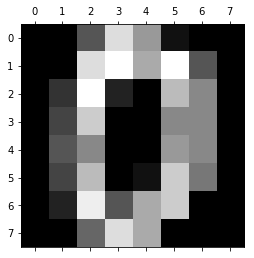

In [5]:
import matplotlib.pyplot as plt
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.target[0]

0

In [22]:
images = [pd.DataFrame(image) for image in digits.images]

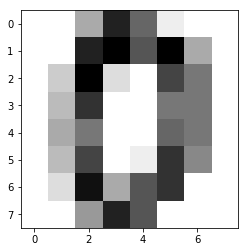

In [26]:
plt.imshow(images[0], cmap='gray_r')

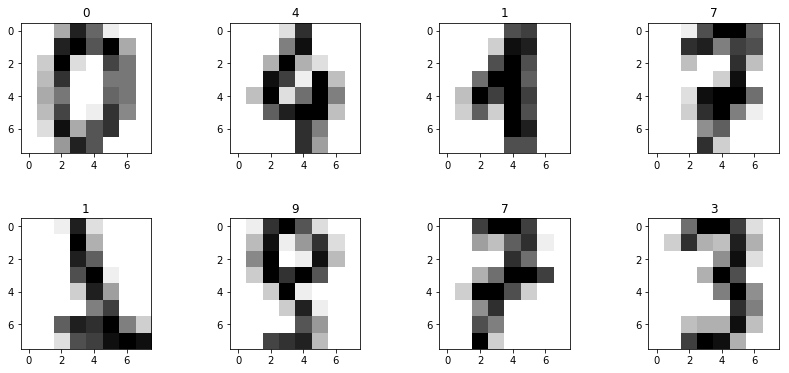

In [84]:
fig, axs = plt.subplots(2,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

indices = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
labels = pd.Series(digits['target'])

for i in range(8):

    axs[i].imshow(images[indices[i]], cmap='gray_r')
    axs[i].set_title(str(labels[indices[i]]))

# Train with K nearest neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold


labels = pd.Series(digits['target'])
data = pd.DataFrame(digits['data'])

# 50% Train / test validation
def train_knn(n, train_features, train_labels):
    # Create model
    knn = KNeighborsClassifier(n_neighbors = n)
    # Fit model
    knn.fit(train_features, train_labels)
    
    return knn

def calc_acc(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=3, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = calc_acc(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
print(np.mean(knn_one_accuracies))

0.9860876020786935


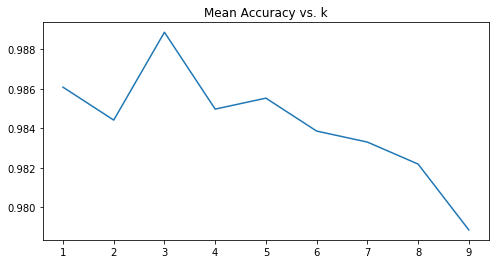

In [45]:
k_values = range(1,10)
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

**There are a few downsides to using k-nearest neighbors:**

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

# Train with MPLClassifier

## Using single layer

In [60]:
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=2000)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state=3)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

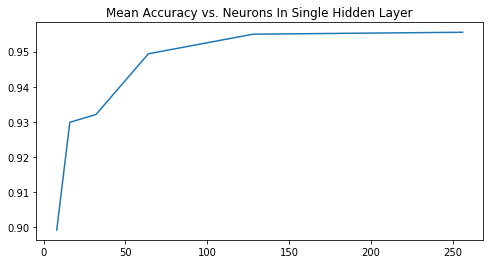

In [61]:
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]

nn_one_accuracies = list()

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

As we can see in the above plot curve, when taking a single layer neuron network, the number of neurons in this layer can improve prediction accuracy. However, from 128 neurons, increasing the number of neurons won't help a lot to improve prediction.

Compare this result with the one achieved with KNN, a single layer NN doesn't give a better accuracy.

## Using two layers

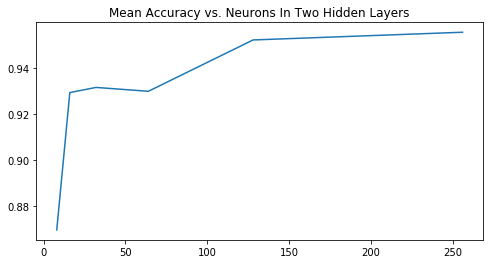

In [77]:
nn_two_neurons = [
    (8, 8),
    (16, 16),
    (32, 32),
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = list()

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

## Using three layers

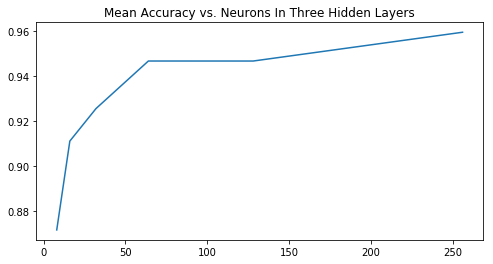

In [78]:
nn_three_neurons = [
    (8, 8, 8),
    (16, 16, 16),
    (32, 32, 32),
    (64, 64, 64),
    (128, 128, 128),
    (256, 256, 256)
]

nn_three_accuracies = list()

for n in nn_three_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

## Using four layers

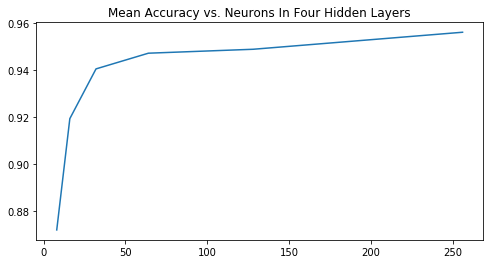

In [79]:
nn_four_neurons = [
    (8, 8, 8, 8),
    (16, 16, 16, 16),
    (32, 32, 32, 32),
    (64, 64, 64, 64),
    (128, 128, 128, 128),
    (256, 256, 256, 256)
]

nn_four_accuracies = list()

for n in nn_four_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_four_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Four Hidden Layers")

x = [i[0] for i in nn_four_neurons]
plt.plot(x, nn_four_accuracies)

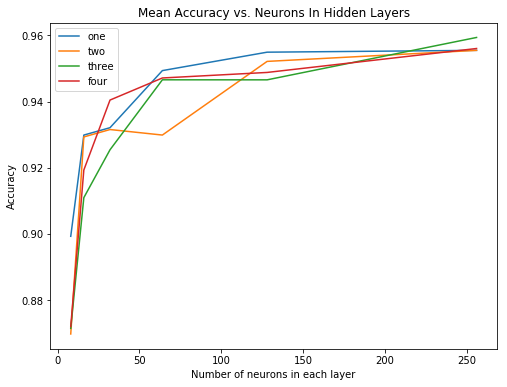

In [82]:
plt.figure(figsize=(8,6))
plt.title("Mean Accuracy vs. Neurons In Hidden Layers")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies, label='one')
plt.plot(x, nn_two_accuracies, label='two')
plt.plot(x, nn_three_accuracies, label='three')
plt.plot(x, nn_four_accuracies, label='four')

plt.xlabel('Number of neurons in each layer')
plt.ylabel('Accuracy')

plt.legend(loc=2)